# Jackknife Example (resampling)

This is an alternative way to test statistical significance for small samples when the underlying distribution is not normal.

In [10]:
#  Load packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.io as sio
import time
from IPython import display

In [11]:
# Load data (we are loading a time series of the North Atlantic Oscillation)
NAO = sio.loadmat('nao_timeseries.mat')

X = NAO['NAO'][:,0] # grab January data only
TIME_NAO = NAO['TIME_NAO'][:,0]

Let's plot the data to see what it looks like.

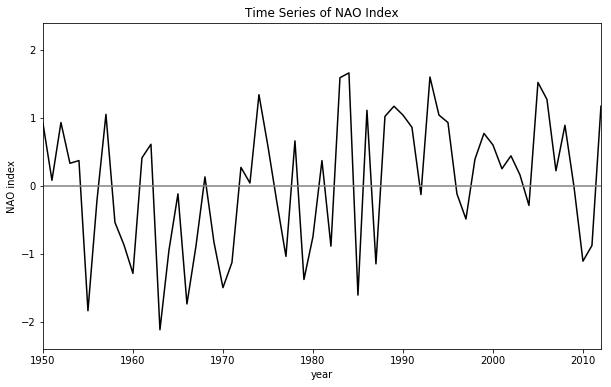

In [12]:
#  Plot data
plt.figure(figsize=(10,6))
plt.plot(TIME_NAO,X,color = 'black', linewidth = 1.5)
plt.xlabel('year');
plt.ylabel('NAO index');
plt.title('Time Series of NAO Index')
plt.ylim(-2.4,2.4);
plt.xlim(min(TIME_NAO), max(TIME_NAO));
plt.axhline(0,color='gray')

Suppose we are interested in examining the trend in this data (we will talk about trends and regression in more detail next week).

We can use a simple linear fit to estimate the trend.

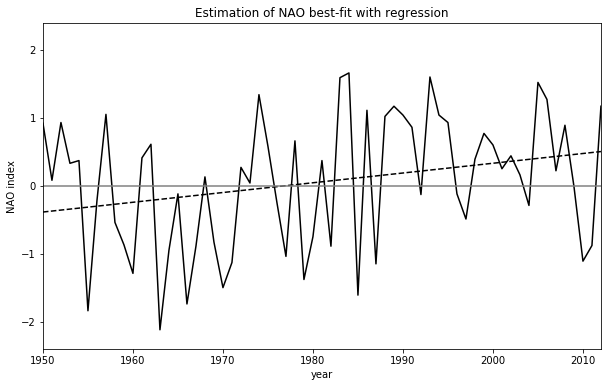

In [13]:
#  Plot data with linear fit
plt.figure(figsize=(10,6))
plt.plot(TIME_NAO,X,color = 'black', linewidth = 1.5)
pobs = np.polyfit(TIME_NAO,X,1)
plt.plot(TIME_NAO,TIME_NAO*pobs[0]+pobs[1],'--',color = 'black', linewidth = 1.5)
plt.xlabel('year');
plt.ylabel('NAO index');
plt.title('Estimation of NAO best-fit with regression');
plt.ylim(-2.4,2.4);
plt.xlim(min(TIME_NAO), max(TIME_NAO));
plt.axhline(0,color='gray')

## How do we determine the 95% confidence levels on this trend line?

Next week, we will talk about the parametric way (using z- or t-statistics), but let's see if we can use a resampling method to get at an estimate.

One such resampling method is called the "Jackknife" method. In this method, we remove one data point from our time series, recalculate the linear fit and repeat. We will get a distribution of possible trends from which we can find the 95\% confidence bounds.

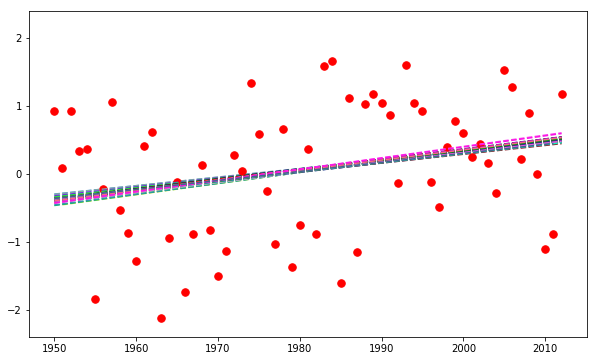

In [14]:
#  Initialize an empty array. We will use this to store our slopes and intercepts
M = np.empty([len(X),2])

#  Initialize plot
plt.figure(figsize=(10,6))

#  Loop over data points
for j, val in enumerate(X):
    
    #  Remove one data point
    X2 = X
    X2 = np.delete(X2,j)
    
    T2 = TIME_NAO
    T2 = np.delete(T2,j)
    
    #  Calculate the linear fit using np.polyfit()
    pfull = np.polyfit(T2,X2,1) 
    
    #  Save the slope and the intercept in an array
    M[j,0] = pfull[0] #slope
    M[j,1] = pfull[1] #intercept
    
    #  Plot data
    if j < len(X)-1:
        plt.plot(TIME_NAO[j],val,'.',color = 'red', markersize = 15)
        plt.plot(T2,T2*pfull[0] + pfull[1],'--', color = np.random.random_sample(size = 3))
        plt.ylim(-2.4,2.4);
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.05)
    else:
        plt.plot(TIME_NAO[j],val,'.',color = 'red', markersize = 15)
        plt.plot(T2,T2*pfull[0] + pfull[1],'--', color = np.random.random_sample(size = 3))
        display.clear_output(wait=True)

As you can see we get a slightly different slop each time we remove a data point.

So, let's plot the histograms of the slopes and intercepts to find the 95\% confidence bounds.

Text(0.5,1,'Distribution of NAO y-intercept from jackknife')

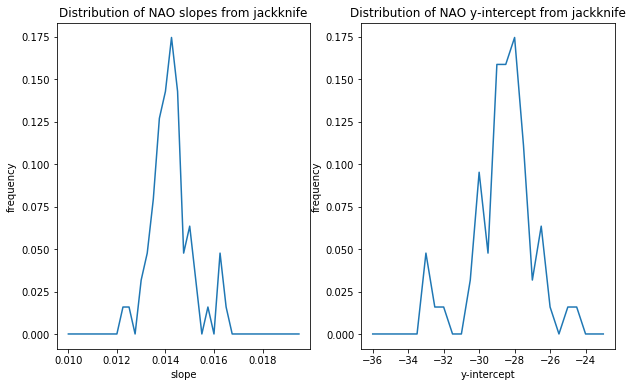

In [15]:
#  Plot histogram of slopes
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
xint = np.arange(.01,.02,.00025)
b, bin_edges = np.histogram(M[:,0],xint)
plt.plot(bin_edges[:-1],b/M.shape[0])
plt.xlabel('slope')
plt.ylabel('frequency')
plt.title('Distribution of NAO slopes from jackknife')

#  Plot histogram of intercepts
plt.subplot(1,2,2)
xint = np.arange(-36.,-22.,.5)
y, bin_edges = np.histogram(M[:,1],xint)
plt.plot(bin_edges[:-1],y/M.shape[0])
plt.xlabel('y-intercept')
plt.ylabel('frequency')
plt.title('Distribution of NAO y-intercept from jackknife')
        

Now, we can use stats.scoreofpercentile() to find the confidence bounds.

In [16]:
CI_upper = stats.scoreatpercentile(M[:,0],97.5)
CI_lower = stats.scoreatpercentile(M[:,0],2.5)
print(CI_upper, CI_lower)

0.016437903871028205 0.012843908503342119


/Users/Karen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


## For Lecture 4:

In [24]:
#Detrend NAO timeseries
NAO_dtr = X - TIME_NAO*pobs[0]-pobs[1]

In [25]:
#alternatively
from scipy import signal
NAO_dtr = signal.detrend(X)

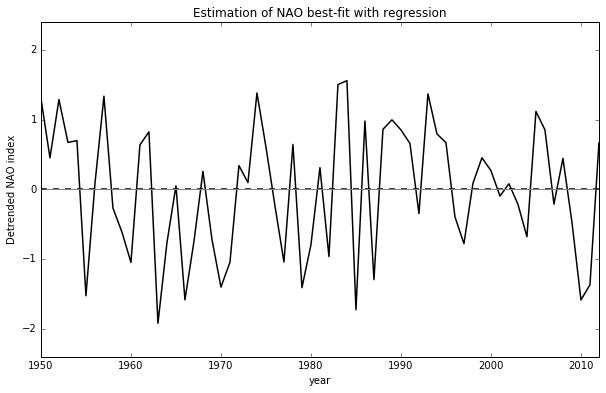

In [30]:
plt.figure(figsize=(10,6))
plt.plot(TIME_NAO,NAO_dtr,color = 'black', linewidth = 1.5)
pfull2 = np.polyfit(TIME_NAO,NAO_dtr,1)
plt.plot(TIME_NAO,TIME_NAO*pfull2[0]+pfull2[1],'--',color = 'black', linewidth = 1.5)
plt.xlabel('year');
plt.ylabel('Detrended NAO index');
plt.title('Estimation of NAO best-fit with regression');
plt.ylim(-2.4,2.4);
plt.xlim(min(TIME_NAO), max(TIME_NAO));
plt.axhline(0,color='gray')